# <center>CHE1147 Data Mining in Engineering</center>

## <center>Assignment 3</center>


#### <div style="text-align: right">Bowen Xu</div>
#### <div style="text-align: right">1006411786</div>    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Feature Engineering

### 1.1 Import the data and create the anchor date columns

##### &emsp;&emsp;&emsp; - 1. Import the dataset as <b>txn</b> and identify the number of rows.

In [2]:
txn = pd.read_csv('Retail_Data_Transactions.csv')

In [3]:
print('Number of Rows:',len(txn))

Number of Rows: 125000


##### &emsp;&emsp;&emsp; - 2. The date-format in column ’trans_date’ is not standard. Create a new column ’txn_date’ from ’trans_date’ with pd.to datetime and drop the column ’trans_date’.

In [4]:
txn['txn_date'] = pd.to_datetime(txn['trans_date'])

In [5]:
txn.drop('trans_date',inplace=True,axis=1)

In [6]:
txn.head()

,customer_id,tran_amount,txn_date
0,CS5295,35,2013-02-11
1,CS4768,39,2015-03-15
2,CS2122,52,2013-02-26
3,CS1217,99,2011-11-16
4,CS1850,78,2013-11-20


##### &emsp;&emsp;&emsp; - 3. Identify the min() and max() of column ’txn_date’.

In [7]:
txn.txn_date.min()

Timestamp('2011-05-16 00:00:00')

In [8]:
txn.txn_date.max()

Timestamp('2015-03-16 00:00:00')

##### &emsp;&emsp;&emsp; - 4. Create the column ’ME_DT’: the last day of the month in the ’trans date’ column. DateOffset objects is a simple way to do this in pandas.

In [9]:
from pandas.tseries.offsets import MonthEnd

In [10]:
txn['ME_DT'] = txn.txn_date + MonthEnd(0)

In [11]:
txn.head()

,customer_id,tran_amount,txn_date,ME_DT
0,CS5295,35,2013-02-11,2013-02-28
1,CS4768,39,2015-03-15,2015-03-31
2,CS2122,52,2013-02-26,2013-02-28
3,CS1217,99,2011-11-16,2011-11-30
4,CS1850,78,2013-11-20,2013-11-30


##### &emsp;&emsp;&emsp; - 5. Create the column ’YEAR’: the year in the ’trans date’ column. DatetimeIndex with attribute .year will help you do so.

In [12]:
txn['YEAR'] = pd.DatetimeIndex(txn.txn_date).year

In [13]:
txn.head()

,customer_id,tran_amount,txn_date,ME_DT,YEAR
0,CS5295,35,2013-02-11,2013-02-28,2013
1,CS4768,39,2015-03-15,2015-03-31,2015
2,CS2122,52,2013-02-26,2013-02-28,2013
3,CS1217,99,2011-11-16,2011-11-30,2011
4,CS1850,78,2013-11-20,2013-11-30,2013


In [14]:
#check output
txn.iloc[55:60,:]

,customer_id,tran_amount,txn_date,ME_DT,YEAR
55,CS2662,88,2014-08-31,2014-08-31,2014
56,CS2209,35,2012-03-12,2012-03-31,2012
57,CS4530,40,2011-06-05,2011-06-30,2011
58,CS2848,53,2013-02-04,2013-02-28,2013
59,CS2596,55,2011-09-19,2011-09-30,2011


### 1.2  Create features that capture annual spending

##### &emsp;&emsp;&emsp; - 1. Using groupby and NamedAgg create <b>clnt_annual_aggregations</b>, the annual aggregations dataframe: with sum, mean, std, var, sem, max, min, count as the aggregation functions. A snapshot of the output table is shown below. Notice that the output is a typical MultiIndex pandas dataframe.

In [15]:
clnt_annual_aggregations = txn.groupby(['customer_id','YEAR']).agg(ann_txn_amt_sum = pd.NamedAgg(column='tran_amount',aggfunc='sum'),\
                                                                   ann_txn_amt_ave = pd.NamedAgg(column='tran_amount',aggfunc='mean'),\
                                                                   ann_txn_amt_std = pd.NamedAgg(column='tran_amount',aggfunc='std'),\
                                                                   ann_txn_amt_var = pd.NamedAgg(column='tran_amount',aggfunc='var'),\
                                                                   ann_txn_amt_sem = pd.NamedAgg(column='tran_amount',aggfunc='sem'),\
                                                                   ann_txn_amt_max = pd.NamedAgg(column='tran_amount',aggfunc='max'),\
                                                                   ann_txn_amt_min = pd.NamedAgg(column='tran_amount',aggfunc='min'),\
                                                                   ann_txn_cnt = pd.NamedAgg(column='tran_amount',aggfunc='count'))

In [16]:
#check output
clnt_annual_aggregations.head()

ann_txn_amt_sum  ann_txn_amt_ave  ann_txn_amt_std  \
customer_id YEAR                                                      
CS1112      2011              212        70.666667        22.030282   
            2012              337        67.400000        12.720063   
            2013              212        70.666667        34.501208   
            2014              212        70.666667        16.862186   
            2015               39        39.000000              NaN   

                  ann_txn_amt_var  ann_txn_amt_sem  ann_txn_amt_max  \
customer_id YEAR                                                      
CS1112      2011       485.333333        12.719189               96   
            2012       161.800000         5.688585               81   
            2013      1190.333333        19.919282              105   
            2014       284.333333         9.735388               90   
            2015              NaN              NaN               39   

                  ann_txn_amt_min  ann_txn_cnt  
customer_id YEAR                                
CS1112      2011               56            3  
            2012               52            5  
            2013               36            3  
            2014               59            3  
            2015               39            1

##### &emsp;&emsp;&emsp; - 2. Plot the histogram of the sum and count.

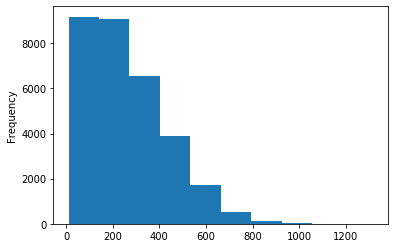

In [17]:
#plot sum
clnt_annual_aggregations['ann_txn_amt_sum'].plot.hist()
plt.savefig('ann_txn_amt_sum.png')

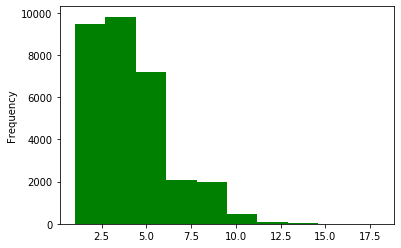

In [18]:
#plot count
clnt_annual_aggregations['ann_txn_cnt'].plot.hist(color='g')
plt.savefig('ann_txn_cnt.png')

##### &emsp;&emsp;&emsp; - 3. Reset the index and reshape the table with the pivot table function to create the <b>clnt_annual_aggregations_pivot</b> table shown below with 40 columns (why 40?). You should expect columns with NaN values. Impute the NaN entries when you perform the pivot table function and explain your choice of values.

<div style='color:purple'> For each aggregated feature (8 features in total), there are five years of data; therefore, 8 * 5 = 40 columns in total. It is reasonable to fill the missing values with 0s since it indicates that the custormer didn't have any transactions during that year.

In [19]:
clnt_annual_aggregations_pivot = clnt_annual_aggregations.reset_index().pivot_table(columns='YEAR',index='customer_id').fillna(0)

In [20]:
#check output
clnt_annual_aggregations_pivot.head()

ann_txn_amt_ave                                              \
YEAR                   2011       2012       2013       2014       2015   
customer_id                                                               
CS1112            70.666667  67.400000  70.666667  70.666667  39.000000   
CS1113            81.333333  74.800000  85.200000  56.500000  73.333333   
CS1114            85.200000  75.000000  70.400000  70.833333  79.000000   
CS1115            87.000000  67.571429  79.571429  78.250000  55.000000   
CS1116            58.750000  76.666667  59.000000  66.600000   0.000000   

            ann_txn_amt_max                            ... ann_txn_amt_var  \
YEAR                   2011   2012   2013  2014  2015  ...            2011   
customer_id                                            ...                   
CS1112                 96.0   81.0  105.0  90.0  39.0  ...      485.333333   
CS1113                 94.0   95.0   97.0  97.0  98.0  ...      444.333333   
CS1114                 97.0   97.0  105.0  95.0  79.0  ...       94.700000   
CS1115                102.0  104.0   94.0  98.0  55.0  ...      225.000000   
CS1116                 87.0  105.0   59.0  96.0   0.0  ...      449.583333   

                                                             ann_txn_cnt       \
YEAR               2012         2013        2014        2015        2011 2012   
customer_id                                                                     
CS1112       161.800000  1190.333333  284.333333    0.000000         3.0  5.0   
CS1113       290.200000   171.200000  781.666667  745.333333         3.0  5.0   
CS1114       968.000000   619.300000  726.166667    0.000000         5.0  2.0   
CS1115       477.285714   110.952381  512.250000    0.000000         3.0  7.0   
CS1116       908.333333     0.000000  636.800000    0.000000         4.0  3.0   

                            
YEAR        2013 2014 2015  
customer_id                 
CS1112       3.0  3.0  1.0  
CS1113       5.0  4.0  3.0  
CS1114       5.0  6.0  1.0  
CS1115       7.0  4.0  1.0  
CS1116       1.0  5.0  0.0  

[5 rows x 40 columns]

##### &emsp;&emsp;&emsp; - 4. The pivoted object you created is a MultiIndex object with hierarchical indexes. You can see the first level (i.e. 0) in the snapshot above with names ’ann txn amt ave’, ’ann txn amt max’ (and more as indicated by the ...) and the second level (i.e. 1) with names ’2011’, ’2012’, etc. You can confirm the multiple levels of the columns with the following two expressions. 

##### &emsp;&emsp;&emsp;&emsp; What are your observations regarding the number of levels and the column names?

<div style='color:purple'> The number of levels of the columns matches with the number of elements in each of the column names (tuples).

In [21]:
clnt_annual_aggregations_pivot.columns.nlevels

2

In [22]:
clnt_annual_aggregations_pivot.columns

MultiIndex([('ann_txn_amt_ave', 2011),
            ('ann_txn_amt_ave', 2012),
            ('ann_txn_amt_ave', 2013),
            ('ann_txn_amt_ave', 2014),
            ('ann_txn_amt_ave', 2015),
            ('ann_txn_amt_max', 2011),
            ('ann_txn_amt_max', 2012),
            ('ann_txn_amt_max', 2013),
            ('ann_txn_amt_max', 2014),
            ('ann_txn_amt_max', 2015),
            ('ann_txn_amt_min', 2011),
            ('ann_txn_amt_min', 2012),
            ('ann_txn_amt_min', 2013),
            ('ann_txn_amt_min', 2014),
            ('ann_txn_amt_min', 2015),
            ('ann_txn_amt_sem', 2011),
            ('ann_txn_amt_sem', 2012),
            ('ann_txn_amt_sem', 2013),
            ('ann_txn_amt_sem', 2014),
            ('ann_txn_amt_sem', 2015),
            ('ann_txn_amt_std', 2011),
            ('ann_txn_amt_std', 2012),
            ('ann_txn_amt_std', 2013),
            ('ann_txn_amt_std', 2014),
            ('ann_txn_amt_std', 2015),
            ('ann_txn_amt

##### &emsp;&emsp;&emsp; - 5. Finally, you want to save the dataframe <b>clnt_annual_aggregations_pivot</b> as an.xlsx file for future use in the machine learning assignment. To do so, you want to remove the two levels in columns and create a single level with column names: ’ann txn amt ave 2011’, ’ann txn amt ave 2012’, etc. To do so, use the code snippet below prior to saving the dataframe as an Excel file.

##### &emsp;&emsp;&emsp;&emsp;&emsp; Describe what each line of code in the box does and save the output dataframe as an Excel file <b>annual_features.xlsx</b>. A snapshot of the desired final output is shown below.

<div style='color:purple'> First two lines extract the columns names from the two levels of columns, convert them all to string data type and assign them into 'level_0' and 'level_1', respectively. Now, 'level_0' has all the 'ann_txn_amt_...' column names and 'level_1' has all the years. Then, re-assign the columns of the dataframe by concatenating 'level_0' columns and 'level-1' columns with a '_'.

In [23]:
level_0 = clnt_annual_aggregations_pivot.columns.get_level_values(0).astype(str)
level_1 = clnt_annual_aggregations_pivot.columns.get_level_values(1).astype(str)
clnt_annual_aggregations_pivot.columns = level_0 + '_' + level_1

In [24]:
clnt_annual_aggregations_pivot.head()

,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_max_2011,ann_txn_amt_max_2012,ann_txn_amt_max_2013,ann_txn_amt_max_2014,ann_txn_amt_max_2015,...,ann_txn_amt_var_2011,ann_txn_amt_var_2012,ann_txn_amt_var_2013,ann_txn_amt_var_2014,ann_txn_amt_var_2015,ann_txn_cnt_2011,ann_txn_cnt_2012,ann_txn_cnt_2013,ann_txn_cnt_2014,ann_txn_cnt_2015
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,96.0,81.0,105.0,90.0,39.0,...,485.333333,161.800000,1190.333333,284.333333,0.000000,3.0,5.0,3.0,3.0,1.0
CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,94.0,95.0,97.0,97.0,98.0,...,444.333333,290.200000,171.200000,781.666667,745.333333,3.0,5.0,5.0,4.0,3.0
CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,97.0,97.0,105.0,95.0,79.0,...,94.700000,968.000000,619.300000,726.166667,0.000000,5.0,2.0,5.0,6.0,1.0
CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,102.0,104.0,94.0,98.0,55.0,...,225.000000,477.285714,110.952381,512.250000,0.000000,3.0,7.0,7.0,4.0,1.0
CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,87.0,105.0,59.0,96.0,0.0,...,449.583333,908.333333,0.000000,636.800000,0.000000,4.0,3.0,1.0,5.0,0.0


In [25]:
# clnt_annual_aggregations_pivot.to_excel('annual_features.xlsx')

##### &emsp;&emsp;&emsp; - 6. What are the possible disadvantages in capturing client transaction behavior with the annual features described in this section (if any)?

<div style='color:purple'> For annual features, although it can capture some big pictures of the profile for each client, the data may be too macro to capture centain patterns that only exists in monthly, quarterly data

### 1.3  Create monthly aggregations

##### &emsp;&emsp;&emsp; - 1. Create the dataframe that captures the monthly sum and count of transactions per client (name it <b>clnt_monthly_aggregations</b>). Use the groupby function with the Named Aggregation feature which was introduced in pandas version 0.25.0. Make sure that you name the columns as shown in the figure sample on the right.

In [26]:
clnt_monthly_aggregations = txn.groupby(['customer_id','ME_DT']).agg(mth_txn_amt_sum = pd.NamedAgg(column='tran_amount',aggfunc='sum'),\
                                                                     mth_txn_cnt = pd.NamedAgg(column='tran_amount',aggfunc='count'))

In [27]:
#check output
clnt_monthly_aggregations.loc['CS1112']

,mth_txn_amt_sum,mth_txn_cnt
ME_DT,,
2011-06-30,56,1
2011-08-31,96,1
2011-10-31,60,1
2012-04-30,56,1
2012-06-30,52,1
2012-07-31,81,1
2012-09-30,72,1
2012-12-31,76,1
2013-03-31,105,1


##### &emsp;&emsp;&emsp; - 2. Create a histogram of both columns you created. What are your observations? What are the most common and maximum values for each column? How do they compare with the ones in section 1.2?

<div style='color:purple'> By comparing both annual and monthly transactions, both graphs are left-skewed but monthly graphs tend to have smaller and sparser x-axis scale. The most common and maximum values for each column are printed out below. We can clearly see clients prefer to only make transactions once per month.

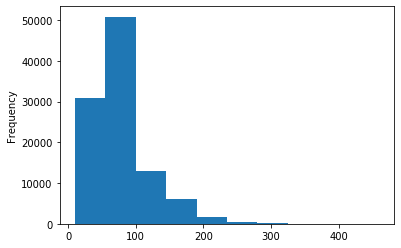

In [28]:
#plot sum
clnt_monthly_aggregations['mth_txn_amt_sum'].plot.hist()
plt.savefig('mth_txn_amt_sum.png')

In [29]:
print('Most Common Value:',clnt_monthly_aggregations['mth_txn_amt_sum'].mode()[0])
print('Maximum Value:',clnt_monthly_aggregations['mth_txn_amt_sum'].max())

Most Common Value: 77
Maximum Value: 460


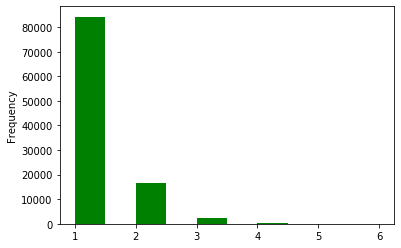

In [30]:
#plot count
clnt_monthly_aggregations['mth_txn_cnt'].plot.hist(color='g')
plt.savefig('mth_txn_cnt.png')

In [31]:
print('Most Common Value:',clnt_monthly_aggregations['mth_txn_cnt'].mode()[0])
print('Maximum Value:',clnt_monthly_aggregations['mth_txn_cnt'].max())

Most Common Value: 1
Maximum Value: 6


### 1.4 Create the base table for the rolling window features

##### &emsp;&emsp;&emsp; - 1. Create the numpy array of the unique elements in columns ’customer_id’ and ’ME_DT’ of the <b>txn</b> table you created in section 1.1. Confirm that you have 6,889 unique clients and 47 unique month-end-dates.

In [32]:
clnt_no = txn['customer_id'].unique()
me_dt = txn['ME_DT'].unique()

In [33]:
print('Number of unique clients:',len(clnt_no))
print('Number of unique month-end-dates:',len(me_dt))

Number of unique clients: 6889
Number of unique month-end-dates: 47


##### &emsp;&emsp;&emsp; - 2. Use itertools.product to generate all the possible combinations of ’customer_id’ and ’ME_DT’. Itertools is a Python module that iterates over data in a computationally efficient way. You can perform the same task with a for-loop, but the execution may be inefficient. For a brief overview of the Itertools module see here. If you named the numpy arrays with the unique elements: <b>clnt_no</b> and <b>me_dt</b>, then the code below will create an itertools.product object (you can confirm this by running: type(base table)).

In [34]:
from itertools import product
base_table = product(clnt_no,me_dt)

##### &emsp;&emsp;&emsp; - 3. Next, you want to convert the itertools.product object <b>base_table</b> into a pandas object called <b>base_table_pd</b>. To do so, use pd.DataFrame.from records and name the columns ’CLNT_NO’ and ’ME_DT’.

In [35]:
base_table_pd = pd.DataFrame.from_records(base_table,columns=['CLNT_NO','ME_DT'])

##### &emsp;&emsp;&emsp; - 4. Finally, you want to validate that you created the table you originally wanted. There are two checks you want to perform:

- Filter client CS1112 and confirm that the dates fall between the min and max month-dates you identified in section 1.1. Also, confirm that the snapshot of client CS1112 has 47 rows, one for each month in the dataset.

- Confirm that the <b>base_table_pd</b> has 323,783 rows, which is the expected value of combinations for 6,889 unique clients and 47 unique month-end dates.

In [36]:
base_table_pd[base_table_pd['CLNT_NO']=='CS1112']['ME_DT'].min()

Timestamp('2011-05-31 00:00:00')

In [37]:
base_table_pd[base_table_pd['CLNT_NO']=='CS1112']['ME_DT'].max()

Timestamp('2015-03-31 00:00:00')

In [38]:
#client CS1112
len(base_table_pd[base_table_pd['CLNT_NO']=='CS1112'])

47

In [39]:
#number of rows
len(base_table_pd)

323783

In [40]:
# unique clients
base_table_pd['CLNT_NO'].nunique()

6889

In [41]:
#unique month-end dates
base_table_pd['ME_DT'].nunique()

47

### 1.5 Create the monthly rolling window features

##### &emsp;&emsp;&emsp; - 1. Left-join the <b>base_table_pd</b> with the <b>clnt_monthly_aggregations</b> table from section 1.3 on [CLNT NO, ME DT] to create the table <b>base_clnt_mth</b>. Comment on the following questions in Markdown:
- Why do some rows have NaN values?
<div style='color:purple'> clnt_monthly_aggregations table doesn't have matched records in the the base_table_pd.
- What values will you choose to impute NaN values in the sum and count columns? Perform the imputation you suggest.
<div style='color:purple'> Missing values will still be filled with 0s since it indicates the customer had no transactions at that month.
- Confirm that the number of rows is what you expect. What is the value?
<div style='color:purple'> 323783 rows which matches the number of rows in base_table_pd
- How are tables <b>base_clnt_mth</b> and <b>clnt_monthly_aggregations</b> different? Comment on the number of rows and the content of each table.
<div style='color:purple'> base_clnt_mth includes all the combinations of customers and months but clnt_monthly_aggregations table only has all the records for customers had transactions in a certain month (only has 103234 transactional records).

In [42]:
clnt_monthly_aggregations.index.set_names(['CLNT_NO','ME_DT'],inplace=True)

In [43]:
base_clnt_mth = pd.merge(base_table_pd,clnt_monthly_aggregations,on=['CLNT_NO','ME_DT'],how='left').fillna(0)

In [44]:
len(base_clnt_mth)

323783

In [45]:
len(clnt_monthly_aggregations)

103234

##### &emsp;&emsp;&emsp; - 2. For the next step, the calculation of the rolling window features, you need to sort the data first by ’CLNT_NO’ and then by ’ME_DT’ in ascending order. This is necessary to create the order for rolling windows, e.g. 2011-05-31, 2011-06-30, etc.

In [46]:
base_clnt_mth.sort_values(['CLNT_NO','ME_DT'],inplace=True)

##### &emsp;&emsp;&emsp; - 3. Here, you have to calculate separately the 3, 6 and 12-month rolling window features (tables: <b>rolling_features_3M, rolling_features_6M, rolling_features_12M</b>) for every client that calculates the aggregations ’sum’, mean’ and ’max’ for both columns ’mth_txn_amt_sum’ and ’mth_txn_cnt’. The steps to achieve this with <b>base_clnt_mth</b> as the starting dataframe are:
- groupby the client number
- select the two columns you want to aggregate
- use the rolling function with the appropriate windows
- aggregate with ’sum’, mean’ and ’max’

##### &emsp;&emsp;&emsp; Also, answer the following questions in the .ipynb notebook as Markdown comments.

- How many rows appear with NaN values at the beginning of each client for 3, 6 and 12-month windows, respectively? Why do they appear?
<div style='color:purple'>2, 5 and 11 rows of missing values respectively since rolling window function will make top rows have no enough window to calculate the numbers.

- How many levels do the index and columns have? Are these MultiIndex dataframes?
<div style='color:purple'> Both index and columns have 2 levels, so they are MultiIndex dataframe.

- Rename the columns as following: ’amt_sum_3M’, ’amt_mean_3M’, ’amt_max_3M’, ’txn_cnt_sum_3M’, ’txn_cnt_mean_3M’, ’txn_cnt_max_3M’ and follow the same naming convention for 6M and 12M.

In [47]:
rolling_features_3M = base_clnt_mth.groupby('CLNT_NO')[['mth_txn_amt_sum','mth_txn_cnt']].rolling(3).agg({"sum": "sum", "mean": "mean","max": "max"})
rolling_features_3M.columns = rolling_features_3M.columns.swaplevel(0,1)
rolling_features_3M.sort_index(axis=1, level=[0,1],inplace=True,ascending=[True,False])

/Users/barry/opt/anaconda3/lib/python3.7/site-packages/pandas/core/window.py:1835: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


In [48]:
#check output
rolling_features_3M.head()

mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  157064             NaN        NaN   NaN         NaN       NaN  NaN
        157058             NaN        NaN   NaN         NaN       NaN  NaN
        157044            56.0  18.666667  56.0         1.0  0.333333  1.0
        157069           152.0  50.666667  96.0         2.0  0.666667  1.0
        157060            96.0  32.000000  96.0         1.0  0.333333  1.0

In [49]:
rolling_features_3M.columns = ['amt_sum_3M','amt_mean_3M','amt_max_3M','txn_cnt_sum_3M','txn_cnt_mean_3M','txn_cnt_max_3M']

In [50]:
rolling_features_6M = base_clnt_mth.groupby('CLNT_NO')[['mth_txn_amt_sum','mth_txn_cnt']].rolling(6).agg({"sum": "sum", "mean": "mean","max": "max"})
rolling_features_6M.columns = rolling_features_6M.columns.swaplevel(0,1)
rolling_features_6M.sort_index(axis=1, level=[0,1],inplace=True,ascending=[True,False])

In [51]:
rolling_features_6M.columns = ['amt_sum_6M','amt_mean_6M','amt_max_6M','txn_cnt_sum_6M','txn_cnt_mean_6M','txn_cnt_max_6M']

In [52]:
rolling_features_12M = base_clnt_mth.groupby('CLNT_NO')[['mth_txn_amt_sum','mth_txn_cnt']].rolling(12).agg({"sum": "sum", "mean": "mean","max": "max"})
rolling_features_12M.columns = rolling_features_12M.columns.swaplevel(0,1)
rolling_features_12M.sort_index(axis=1, level=[0,1],inplace=True,ascending=[True,False])

In [53]:
rolling_features_12M.columns = ['amt_sum_12M','amt_mean_12M','amt_max_12M','txn_cnt_sum_12M','txn_cnt_mean_12M','txn_cnt_max_12M']

##### &emsp;&emsp;&emsp; - 4. Merge the 4 tables: <b>base_clnt_mth, rolling_features_3M, rolling_features_6M, rolling_features_12M</b> in the output <b>all_rolling_features</b>. It is recommended to drop the level:0 of the rolling features MultiIndex table and join with <b>base_clnt_mth</b> on the indexes. Make sure you understand why joining on the indexes preserves the CLNT_NO and ME_DT for each index.

In [54]:
rolling_features_3M.index = rolling_features_3M.index.droplevel(0)
rolling_features_6M.index = rolling_features_6M.index.droplevel(0)
rolling_features_12M.index = rolling_features_12M.index.droplevel(0)

In [55]:
all_rolling_features = base_clnt_mth.join(rolling_features_3M).join(rolling_features_6M).join(rolling_features_12M)

##### &emsp;&emsp;&emsp; - 5. Confirm that your final output <b>all_rolling_features</b> has 323,783 rows and 22 columns and save it as <b>mth_rolling_features.xlsx</b>.

In [56]:
all_rolling_features.shape

(323783, 22)

In [57]:
# all_rolling_features.to_excel('mth_rolling_features.xlsx')

### 1.6 Date-related features: date of the week

##### &emsp;&emsp;&emsp; - 1. The DatetimeIndex object you used earlier allows you to extract many components of a DateTime object. Here, you want to use the attributes <b>dt.dayofweek</b> and/or <b>dt.day name()</b> to extract the day of the week from column ’txn date’ of the <b>txn</b> table (with Monday=0, Sunday=6). The expected output below shows both columns.

In [58]:
txn['day_of_the_week'] = txn['txn_date'].dt.dayofweek
txn['day_name'] = txn['txn_date'].dt.day_name()

In [59]:
# check output
txn.head()

,customer_id,tran_amount,txn_date,ME_DT,YEAR,day_of_the_week,day_name
0,CS5295,35,2013-02-11,2013-02-28,2013,0,Monday
1,CS4768,39,2015-03-15,2015-03-31,2015,6,Sunday
2,CS2122,52,2013-02-26,2013-02-28,2013,1,Tuesday
3,CS1217,99,2011-11-16,2011-11-30,2011,2,Wednesday
4,CS1850,78,2013-11-20,2013-11-30,2013,2,Wednesday


In [60]:
txn.day_name.unique()

array(['Monday', 'Sunday', 'Tuesday', 'Wednesday', 'Friday', 'Saturday',
       'Thursday'], dtype=object)

##### &emsp;&emsp;&emsp; - 2. Plot the histogram that shows the count of transactions per day of the week

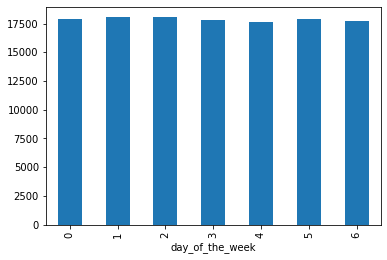

In [61]:
txn.groupby('day_of_the_week')['customer_id'].count().plot.bar()
plt.savefig('transaction_per_day.png')

##### &emsp;&emsp;&emsp; - 3. Following the same logic as in section 1.2, generate the features that capture the count of transactions per client, year and day of the week. The intermediate MultiIndex dataframe (with nlevels=3) and the final pivoted output with a single index are shown in the snapshots below.

<div style='color:purple'> There are 35 new features created since 7 * 5 = 35

In [62]:
temp = txn.groupby(['customer_id','YEAR','day_name'])['tran_amount'].count()\
                                                                    .reset_index()\
                                                                    .pivot_table(columns=['YEAR','day_name'],index='customer_id')\
                                                                    .fillna(0)

In [63]:
temp.columns.nlevels

3

In [64]:
level1 = temp.columns.get_level_values(1).astype(str)
level2 = temp.columns.get_level_values(2).astype(str)
temp.columns = 'cnt_' + level1 + '_' + level2

In [65]:
temp

,cnt_2011_Friday,cnt_2011_Monday,cnt_2011_Saturday,cnt_2011_Sunday,cnt_2011_Thursday,cnt_2011_Tuesday,cnt_2011_Wednesday,cnt_2012_Friday,cnt_2012_Monday,cnt_2012_Saturday,...,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CS1113,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,...,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
CS1114,0.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
CS1115,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
CS1116,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS8996,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,...,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CS8997,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CS8998,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### &emsp;&emsp;&emsp; - 4. Confirm that your output has the same number of rows as the final output in section 1.2 and save it as <b>annual_day_of_week_counts_pivot.xlsx</b>. How many features/columns did you create in this section?

In [66]:
len(clnt_annual_aggregations_pivot) == len(temp)

True

In [67]:
temp.shape

(6889, 35)

In [68]:
# temp.to_excel('annual_day_of_week_counts_pivot.xlsx')

##### &emsp;&emsp;&emsp; - 5. Similarly, generate the features that capture the count of transactions per client, month-end-date and day of the week. In contrast with the annual pivot table in the previous step, here you want to create the pivot with [’customer_id’, ’ME_DT’] as index to obtain the following output dataframe.

In [69]:
temp2 = txn.groupby(['customer_id','ME_DT','day_name'])['tran_amount'].count()\
                                                                        .reset_index()\
                                                                        .pivot_table(columns='day_name',index=['customer_id','ME_DT'])\
                                                                        .fillna(0)

In [70]:
level1 = temp2.columns.get_level_values(1).astype(str)
temp2.columns = 'cnt_' + level1

##### &emsp;&emsp;&emsp; - 6. Join with <b>base_table_pd</b> as you did in section 1.5 and impute with your choice of value for NaN. Save the final output as <b>mth_day_counts.xlxs</b>.

<div style='color:purple'> Still using 0 to fill the missing values with same reason as before.

In [71]:
temp2.index.set_names(['CLNT_NO','ME_DT'],inplace=True)

In [72]:
mth_day_counts = pd.merge(base_table_pd,temp2,on=['CLNT_NO','ME_DT'],how='left').fillna(0)

In [73]:
# mth_day_counts.to_excel('mth_day_counts.xlsx')

### 1.7 Date-related features: days since last transaction

##### &emsp;&emsp;&emsp; - 1. The starting point is again the <b>txn</b> table. Recall that most clients have a single purchase per month, but some clients have multiple purchases in a month. Since you want to calculate the ”days since last transaction”, you want to capture the last transaction in a month for every client. Use the appropriate groupby to create the table <b>last_monthly_purchase</b> that captures the last ’txn date’ (aggfunc=max) for every client and month.

In [74]:
last_monthly_purchase = txn.groupby(['customer_id','ME_DT']).agg(last_monthly_purchase=pd.NamedAgg(column='txn_date',aggfunc='max'))

##### &emsp;&emsp;&emsp; - 2. Join <b>base_table_pd</b> with <b>last_monthly_purchase</b> as you did in section 1.5. The snapshot below shows the output of the created object <b>last_monthly_purchase_base</b> for client CS1112 who made her/his first purchase on June 2011, then no purchase on July and made a purchase again on August 2011. What values will you use to impute the NaT values here? NaT stands for ”Not a Timestamp”.

In [75]:
last_monthly_purchase.index.set_names(['CLNT_NO','ME_DT'],inplace=True)

In [76]:
temp3 = pd.merge(base_table_pd,last_monthly_purchase,on=['CLNT_NO','ME_DT'],how='left').sort_values(by=['CLNT_NO','ME_DT'])

In [77]:
temp3.head(10)

,CLNT_NO,ME_DT,last_monthly_purchase
157064,CS1112,2011-05-31,NaT
157058,CS1112,2011-06-30,2011-06-15
157044,CS1112,2011-07-31,NaT
157069,CS1112,2011-08-31,2011-08-19
157060,CS1112,2011-09-30,NaT
157048,CS1112,2011-10-31,2011-10-02
157029,CS1112,2011-11-30,NaT
157049,CS1112,2011-12-31,NaT
157046,CS1112,2012-01-31,NaT
157032,CS1112,2012-02-29,NaT


##### &emsp;&emsp;&emsp; - 3. To answer the imputation problem, we have to think what value should we use for say July 2011 for ’last monthly purchase’? The answer is that in July the value for the last monthly purchase is the previous line value: 2011-06-15. In other words, for every client we want to forward-fill the NaT values. While pandas fillna() method has a method to forward-fill, here we want to use the apply and a lambda function with the forward-fill function ffill(), with the following expression: .apply(lambda x: x.ffill()) applied on object <b>last_monthly_purchase_base</b> grouped by CLNT NO. Below, I am showing a snapshot for lines [92:98] that confirm the transition between clients CS1113 and CS1114. You can also recreate the forward-fill with the fillna() method, however there is a disadvantage and a reason the .apply() method is preferred here.

In [78]:
temp3['last_monthly_purchase'] = temp3.groupby('CLNT_NO')['last_monthly_purchase'].apply(lambda x: x.ffill())

In [79]:
temp3.iloc[92:98,:]

,CLNT_NO,ME_DT,last_monthly_purchase
160011,CS1113,2015-02-28,2015-02-09
159989,CS1113,2015-03-31,2015-02-09
101134,CS1114,2011-05-31,NaT
101128,CS1114,2011-06-30,NaT
101114,CS1114,2011-07-31,2011-07-14
101139,CS1114,2011-08-31,2011-08-24


##### &emsp;&emsp;&emsp; - 4. Subtract the two date columns and convert the output to .dt.days to calculate the column ’days since last txn’ as shown in the following snapshot.

In [80]:
temp3['days_since_last_txn'] = (temp3['ME_DT']-temp3['last_monthly_purchase']).dt.days

In [81]:
temp3.head()

,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
157064,CS1112,2011-05-31,NaT,NaN
157058,CS1112,2011-06-30,2011-06-15,15.0
157044,CS1112,2011-07-31,2011-06-15,46.0
157069,CS1112,2011-08-31,2011-08-19,12.0
157060,CS1112,2011-09-30,2011-08-19,42.0


##### &emsp;&emsp;&emsp; - 5. Plot a histogram of the ’days since last txn’. Based on the values you observe in the histogram, impute the remaining NaN values (i.e. for the initial months before a client makes a purchase). Save the columns [’CLNT_NO’, ’ME_DT’, ’days_since_last_txn’] as <b>days_since_last_txn.xlsx</b>.

<div style='color:purple'> I impute the missing values still by their dates of first purchase: for the initial months before a client makes a purchase, I used the those dates minus the date of their first purchase which result in negative values. In this way, it won't influence much on the distributions.

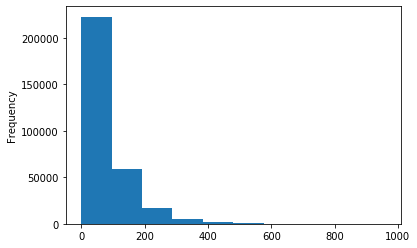

In [82]:
temp3.days_since_last_txn.plot.hist()
plt.savefig('days_since_last_txn.png')

In [154]:
# for client in temp3['CLNT_NO'].unique():
#     df_client = temp3[temp3.CLNT_NO==client]
#     idx = df_client[~df_client.days_since_last_txn.isnull()].index[0] # the index of first day of purchase for each client
#     idx_nan = df_client[df_client.days_since_last_txn.isnull()].index # the index of missing values for each client
#     for i in idx_nan:
#         temp3.loc[i,'days_since_last_txn'] = (temp3.loc[i,'ME_DT'] - temp3.loc[idx,'last_monthly_purchase']).days

In [84]:
temp3 = temp3.fillna(-10)
temp3

,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
157064,CS1112,2011-05-31,-10,-10.0
157058,CS1112,2011-06-30,2011-06-15 00:00:00,15.0
157044,CS1112,2011-07-31,2011-06-15 00:00:00,46.0
157069,CS1112,2011-08-31,2011-08-19 00:00:00,12.0
157060,CS1112,2011-09-30,2011-08-19 00:00:00,42.0
...,...,...,...,...
295140,CS9000,2014-11-30,2014-08-24 00:00:00,98.0
295126,CS9000,2014-12-31,2014-08-24 00:00:00,129.0
295119,CS9000,2015-01-31,2014-08-24 00:00:00,160.0
295136,CS9000,2015-02-28,2015-02-28 00:00:00,0.0


In [85]:
temp3.iloc[92:98,:]

,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
160011,CS1113,2015-02-28,2015-02-09 00:00:00,19.0
159989,CS1113,2015-03-31,2015-02-09 00:00:00,50.0
101134,CS1114,2011-05-31,-10,-10.0
101128,CS1114,2011-06-30,-10,-10.0
101114,CS1114,2011-07-31,2011-07-14 00:00:00,17.0
101139,CS1114,2011-08-31,2011-08-24 00:00:00,7.0


In [87]:
temp3.iloc[:,[0,1,3]].to_excel('days_since_last_txn.xlsx')

KeyboardInterrupt: 